<a href="https://colab.research.google.com/github/yousefosamaali/linear.regression-and-classification-project/blob/main/regression_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score

In [230]:
# Importing the dataset and Extracting the Independent and Dependent variables
placement = pd.read_csv('Placement_Data_Full_Class.csv')
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,NaN,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [231]:
placement.status.value_counts()

,count
status,
Placed,113
Not Placed,67


In [232]:
placement.dropna(subset=['status'], inplace=True)

In [233]:
placement.status.value_counts()

,count
status,
Placed,113
Not Placed,67


In [234]:
print("\nThe Type Of Each Feature :-\n",placement.dtypes)
print("\nThe NULLS Values :-\n",placement.isnull().sum())


The Type Of Each Feature :-
 gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

The NULLS Values :-
 gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [235]:
placement.isna().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


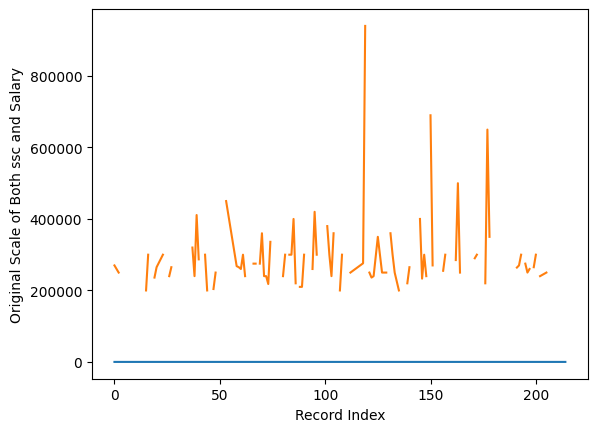

Text(0.5, 1.0, 'Histogram of Salary')

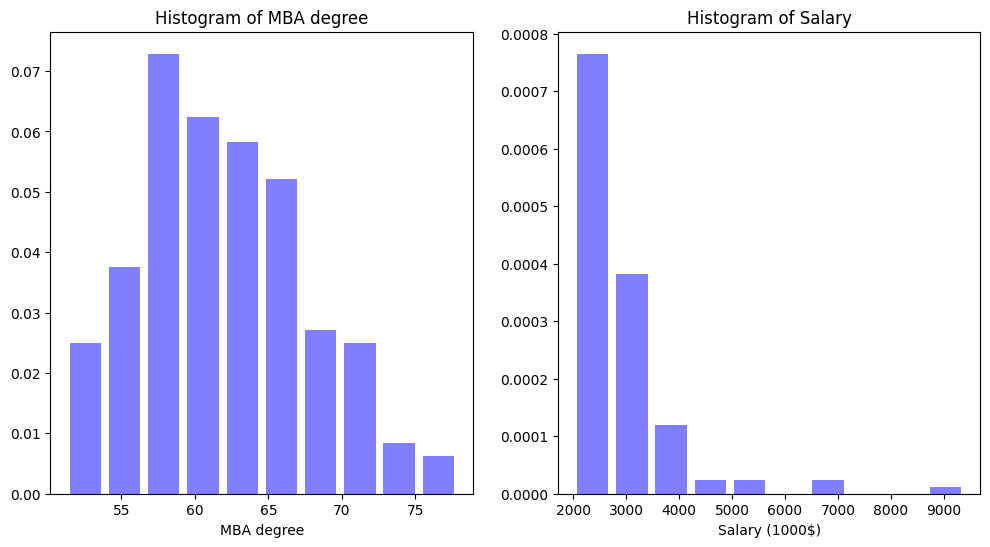

In [236]:
#visualize the problem
plt.plot(placement.ssc_p)
plt.plot(placement.salary)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both ssc and Salary')
plt.show()


fig = plt.figure(figsize=(12, 6))
mba = fig.add_subplot(121)
salary = fig.add_subplot(122)
mba.hist(placement.mba_p, bins=10 ,color = 'blue' , alpha = 0.5 , label = 'Age' , rwidth = 0.8, density = True)
mba.set_xlabel('MBA degree')
mba.set_title("Histogram of MBA degree")

salary.hist(placement.salary/100, bins=10,color = 'blue' , alpha = 0.5 , label = 'Age' , rwidth = 0.8, density = True)
salary.set_xlabel('Salary (1000$)')
salary.set_title("Histogram of Salary")


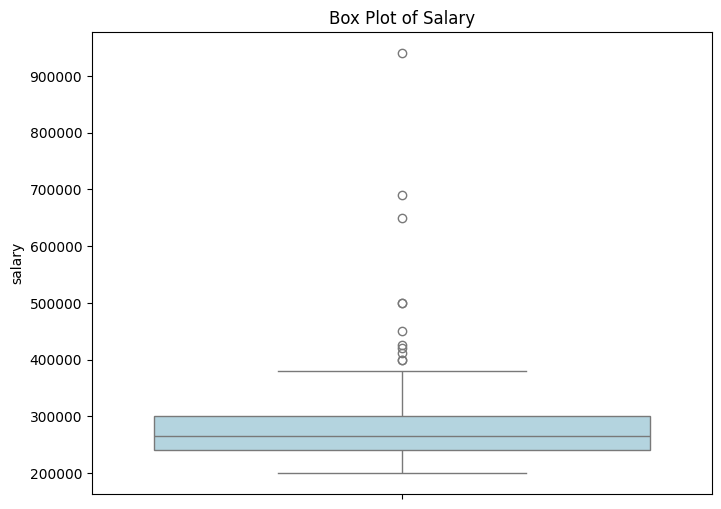

In [237]:
#data containt outliers or no to replace null values visaluze by boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=placement, y='salary', color='lightblue')
plt.title('Box Plot of Salary')
plt.show()

In [238]:
placement['salary'] = placement.apply(
    lambda row: 0 if row['status'].strip().lower() == 'not placed' else row['salary'], axis=1
)

In [239]:
print(placement[['status', 'salary']].head())

       status    salary
0      Placed  270000.0
2      Placed  250000.0
3  Not Placed       0.0
4      Placed  425000.0
5  Not Placed       0.0


In [240]:
placement.isna().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


In [241]:
##Q1 = placement['salary'].quantile(0.25)
#Q3 = placement['salary'].quantile(0.75)
#IQR = Q3 - Q1

#outliers = placement[(placement['salary'] < (Q1 - 1.5 * IQR)) | (placement['salary'] > (Q3 + 1.5 * IQR))]

#print("number of outlier", len(outliers))
#print("number of outlier", outliers)
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05)
outliers = iso.fit_predict(placement[['salary']])
print("Outliers detected:", sum(outliers == -1))


Outliers detected: 9


In [242]:
if len(outliers) > 0:
    placement.loc[outliers == -1, 'salary'] = np.nan
placement.dropna(subset=['salary'], inplace=True)


In [243]:
placement.isna().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


In [118]:
placement['salary']

,salary
0,270000.0
2,250000.0
3,0.0
5,0.0
6,0.0
...,...
206,0.0
207,300000.0
208,0.0
209,216000.0


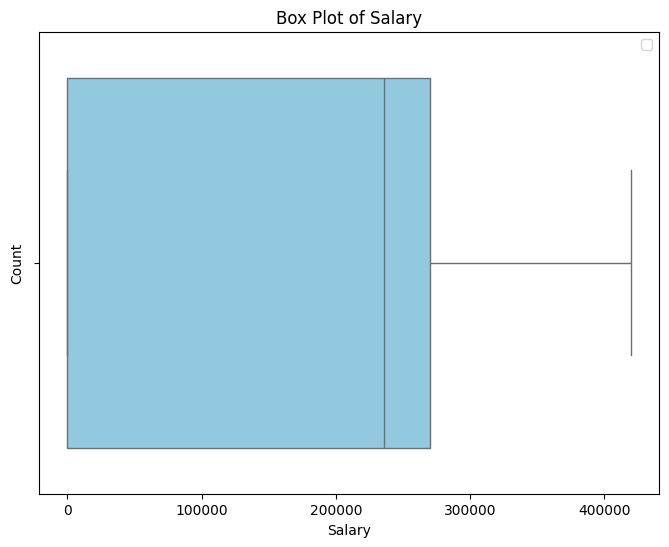

In [119]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=placement['salary'], color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Box Plot of Salary')
plt.legend()
plt.show()

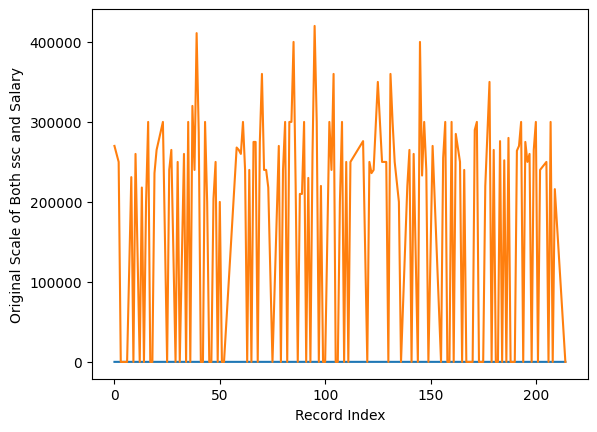

Text(0.5, 1.0, 'Histogram of Salary')

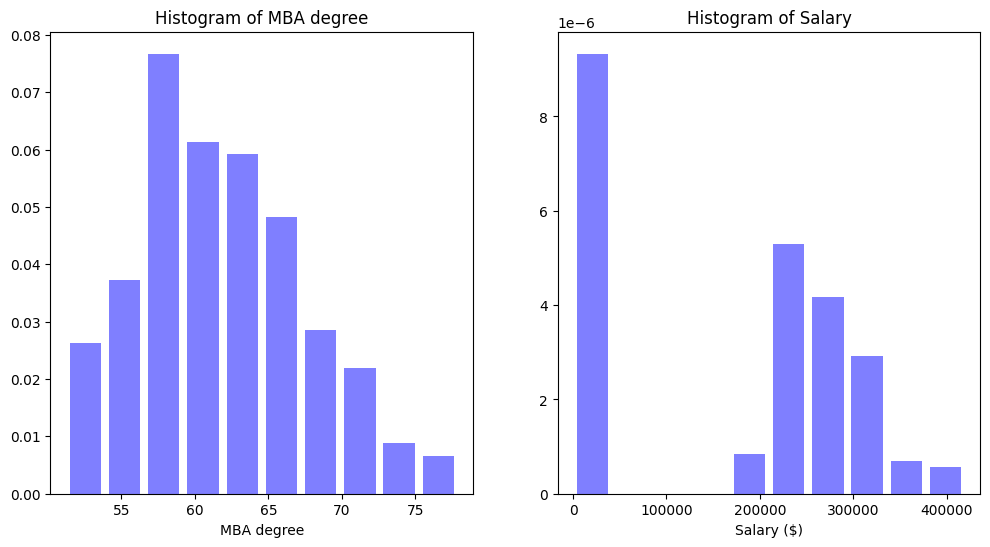

In [124]:
#visualize the problem after scaling
plt.plot(placement.ssc_p)
plt.plot(placement.salary)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both ssc and Salary')
plt.show()


fig = plt.figure(figsize=(12, 6))
mba = fig.add_subplot(121)
salary = fig.add_subplot(122)
mba.hist(placement.mba_p, bins=10,color = 'blue' , alpha = 0.5 , label = 'Age' , rwidth = 0.8, density = True)
mba.set_xlabel('MBA degree')
mba.set_title("Histogram of MBA degree")

salary.hist(placement.salary, bins=10,color = 'blue' , alpha = 0.5 , label = 'Age' , rwidth = 0.8, density = True)
salary.set_xlabel('Salary ($)')
salary.set_title("Histogram of Salary")

In [125]:
X = placement.drop("salary",axis=1)
y = placement["salary"]

In [126]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.0,Others,91.0,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
2,M,65.0,Central,68.0,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed


In [127]:
y.head()

,salary
0,270000.0
2,250000.0
3,0.0
5,0.0
6,0.0


In [128]:
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

In [129]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.0,1,91.0,1,1,58.00,2,0,55.00,1,58.80,1
2,1,65.0,0,68.0,0,0,64.00,0,0,75.00,0,57.80,1
3,1,56.0,0,52.0,0,2,52.00,2,0,66.00,1,59.43,0
5,1,55.0,1,49.8,1,2,67.25,2,1,55.00,0,51.58,0
6,0,46.0,1,49.2,1,1,79.00,0,0,74.28,0,53.29,0


In [130]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [131]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [133]:
# Fitting Multiple Linear Regression to the Training set random forest regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [134]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
68,0.0,1564.605166
183,276000.0,251459.640680
80,240000.0,258690.698192
69,275000.0,279597.921097
160,300000.0,293355.076859
125,350000.0,262334.946711
10,260000.0,254194.081964
192,270000.0,271711.797515
131,360000.0,276154.874473
107,200000.0,279198.561776


In [135]:
mae = mean_absolute_error(y_test,y_pred)
print("MAE= " , mae)

rmsa = mean_squared_error(y_test,y_pred)
print("RMSA= " , np.sqrt(rmsa))

r2 = r2_score(y_test, y_pred)
print("R2= " , r2)

MAE=  22931.49656962943
RMSA=  33368.3676448825
R2=  0.943860512332776


## classification

In [216]:
placement["etest_p"].corr(placement["salary"])
placement["mba_p"].corr(placement["salary"])
placement["ssc_p"].corr(placement["salary"])
placement["hsc_p"].corr(placement["salary"])
placement["degree_p"].corr(placement["salary"])

0.45680817958966796

In [224]:
# descripe
placement.describe()

,ssc_p,ssc_b,hsc_p,degree_p,etest_p,mba_p,salary
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,66.509649,0.432749,37.017544,31.608187,71.037661,61.820058,164491.228070
std,11.231740,0.496912,19.921751,17.158902,13.030095,5.752528,137065.865164
min,40.890000,0.000000,0.000000,0.000000,50.000000,51.210000,0.000000
25%,59.000000,0.000000,22.000000,17.500000,60.000000,57.445000,0.000000
50%,66.000000,0.000000,32.000000,31.000000,68.500000,61.290000,236000.000000
75%,74.550000,1.000000,53.500000,43.500000,82.000000,65.575000,270000.000000
max,89.400000,1.000000,78.000000,68.000000,97.000000,77.890000,420000.000000


In [321]:
salary_bins = [0, 236000.000000, 270000.000000, 420000.000000]
salary_labels = ['Low', 'Medium', 'High']

placement['salary_category'] = pd.cut(placement['salary'], bins=salary_bins, labels=salary_labels, include_lowest=True, right=False)
print(placement['salary_category'].isnull().sum())


0


In [322]:
placement.dropna(subset=['salary_category'], inplace=True)

In [323]:
model2_X = placement.drop(["salary", "salary_category"], axis=1)
model2_y = placement['salary_category'].values

In [324]:
label_encoder = LabelEncoder()
for column in model2_X.select_dtypes(include=['object']).columns:
    model2_X[column] = label_encoder.fit_transform(model2_X[column])

In [325]:
X_train, X_test, y_train, y_test = train_test_split(model2_X, model2_y, test_size=0.2, random_state=42)

In [326]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)


GradientBoostingClassifier()

In [328]:
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,High,Medium
1,High,High
2,Low,Low
3,Medium,Medium
4,High,High
5,Medium,Medium
6,High,High
7,High,High
8,Medium,Medium
9,Low,Low


In [332]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7352941176470589
Confusion Matrix:
 [[8 0 3]
 [1 8 1]
 [3 1 9]]
Classification Report:
               precision    recall  f1-score   support

        High       0.67      0.73      0.70        11
         Low       0.89      0.80      0.84        10
      Medium       0.69      0.69      0.69        13

    accuracy                           0.74        34
   macro avg       0.75      0.74      0.74        34
weighted avg       0.74      0.74      0.74        34



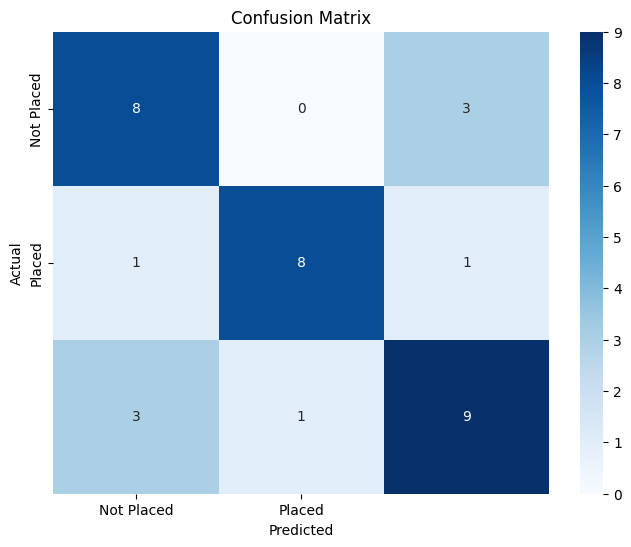

In [333]:
#visualize confusin matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()